In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

# Unzip
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

# Check structure
os.listdir("dataset")


['dataset2-master', 'dataset-master']

In [3]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/dataset2-master/dataset2-master/images/TRAIN",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/dataset2-master/dataset2-master/images/TRAIN",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

print("✅ Classes:", train_ds.class_names)


Found 9957 files belonging to 4 classes.
Using 7966 files for training.
Found 9957 files belonging to 4 classes.
Using 1991 files for validation.
✅ Classes: ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [19]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/dataset2-master/dataset2-master/images/TRAIN",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/dataset2-master/dataset2-master/images/TRAIN",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

print("✅ Classes:", train_ds.class_names)

Found 9957 files belonging to 4 classes.
Using 7966 files for training.
Found 9957 files belonging to 4 classes.
Using 1991 files for validation.
✅ Classes: ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [4]:
# Normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Improve performance with caching and prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 with pretrained weights, no top layers
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # Freeze the pretrained model

# Build the final model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
# ✅ Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.5144 - loss: 1.1451 - val_accuracy: 0.7509 - val_loss: 0.6368
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.7397 - loss: 0.6497 - val_accuracy: 0.7971 - val_loss: 0.5121
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.8079 - loss: 0.4909 - val_accuracy: 0.8443 - val_loss: 0.4128
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.8375 - loss: 0.4136 - val_accuracy: 0.8523 - val_loss: 0.3737
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.8688 - loss: 0.3461 - val_accuracy: 0.8845 - val_loss: 0.3020
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.8829 - loss: 0.3043 - val_accuracy: 0.9026 - val_loss: 0.2746
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.8922 - loss: 0.2830 - val_accuracy: 0.9046 - val_loss: 0.2519
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.9144 - loss: 0.2278 - val_accu

In [7]:
# ✅ Save the trained model
model.save("Blood Cell.h5")
print("✅ Model saved successfully as 'Blood Cell.h5'")


✅ Model saved successfully as 'Blood Cell.h5'


In [8]:
from google.colab import files
files.download("Blood Cell.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

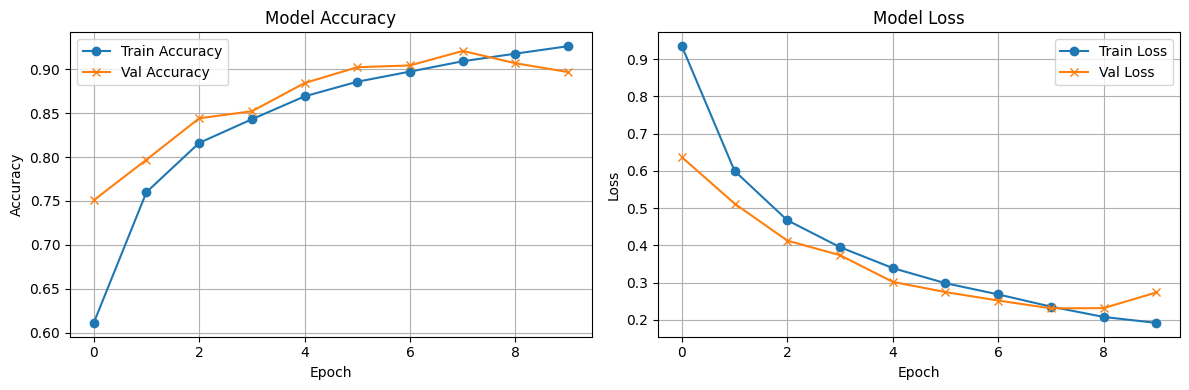

In [9]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
from google.colab import files
uploaded = files.upload()


Saving _0_147.jpeg to _0_147.jpeg


In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "_0_147.jpeg"  # change this to your uploaded image filename

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize same as training

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

score = tf.nn.softmax(predictions[0])
print("🔍 Predicted Class:",train_ds.class_names[np.argmax(score)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
🔍 Predicted Class: LYMPHOCYTE
